In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
from typing import List
import numpy as np
import joblib
from mprompt.modules.fmri_module import SAVE_DIR_FMRI
import imodelsx.util
from mprompt.modules.emb_diff_module import EmbDiffModule
import scipy.stats
from mprompt.methods.m4_evaluate import D5_Validator
import torch.cuda
num_top_test_ngrams = 75
# r = (pd.read_pickle('../results/results_fmri.pkl')
    # .sort_values(by=['top_score_synthetic'], ascending=False))
r = (pd.read_pickle('../results/results_fmri_full.pkl')
    .sort_values(by=['top_score_synthetic'], ascending=False))

In [23]:
columns = {
    # fmri stuff
    'subject': 'Subject',
    'module_num': 'Voxel',
    'roi_func': 'ROI (functional)',
    'roi_anat': 'ROI (anatomical)',
    'fmri_test_corr': 'Correlation (test)',
    
    # scores
    'top_score_synthetic': 'Synthetic data score',
    'frac_top_ngrams_module_correct': 'Fraction of matching ngrams (module, top-75)',
    # 'rankcorr_expl_test': 'Correlation (test) when predicting with only explanation',
    # 'frac_top_ngrams_test_correct': 'Fraction of matching ngrams (test, top-75)',
            
    # explanation
    'top_explanation_init_strs': 'Explanation',
        
    # ngrams matching the explanation (used 75 ngrams)
    'top_ngrams_module_correct': 'Matching top ngrams (out of top-75)',
    # 'top_ngrams_test_correct': 'Matching ngrams (test, top-75)',

    # all ngrams
    'top_ngrams_module_25': 'All top ngrams (top-25)',
    # 'top_ngrams_test_25': 'Top ngrams (test, top-25)',

    # alternative explanations
    'explanation_init_strs': 'Explanation candidates',
}

tab = (
    r
    .sort_values(by=['top_score_synthetic'], ascending=False)
    # .sort_values(by=['rankcorr_expl_test'], ascending=False)
    .filter(columns.keys())
    .rename(columns=columns)
    .round(3)
)
with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):
    display(
        tab.head(3)
    )
    tab_join_lists = tab.applymap(lambda x: ' __ '.join(x) if isinstance(x, np.ndarray) or isinstance(x, list) else x)
    tab_join_lists.to_csv('../results/results_fmri.csv', index=False, float_format='%.3f')

,Subject,Voxel,ROI (functional),ROI (anatomical),Correlation (test),Synthetic data score,"Fraction of matching ngrams (module, top-75)",Explanation,Matching top ngrams (out of top-75),All top ngrams (top-25),Explanation candidates
30,UTS03,47,--,[supramarginal],0.551,0.155,0.373,physical or verbal expressions of emotion,"[and gesticulate wildly, and screamed obscenities, screamed obscenities, retorted rather loudly, waved wildly, quick kiss whispered, screamed the words, words were aggressive, a quick kiss, start fake smiling, and screams fuck, and waved wildly, screams fuck you, drinking and cussing, they kissed modestly, yell and scream, i said damn, yell and, gesticulate wildly, yelled boo, screams fuck, went internally ballistic, praying very intensely, hugged them inhaling, hard slap and, scream stop, up kissed me, and cussing]","[compliment like wildly, and gesticulate wildly, i walk briskly, and screamed obscenities, screamed obscenities, retorted rather loudly, say it louder, speak twice to, faking confidence, waved wildly, say one mississippi, quick kiss whispered, two exclamation points, typing suggestive remarks, almost belly flop, avoid eye contact, to say please, to speak twice, puked delicately, silence by asking, medicated into submission, screamed the words, could fake confidence, words were aggressive, run on sentence]","[physical or verbal expressions of emotion, physical or verbal expression]"
117,UTS03,39,--,[rostralmiddlefrontal],0.411,0.150,0.187,"birthdays, birth years, and zodiac signs","[identical birthday, this identical birthday, even my birthday, two identical birthday, piscean, on my birthday, piscean if, birth year so, birthday of, to my birthday, his birth year, birthday so, my birthday is, them pisces]","[two named vladimir, has my surname, identical birthday, same letter and, eclipse and astrology, this identical birthday, even my birthday, in farsi means, half italian, and longitude and, rican half italian, two identical birthday, piscean, half italian so, the smarter the, was french canadian, counterclockwise flow is, mother was french, nine is for, latin for roman, the piscean, but in spanish, english and spanish, my own name, fish are female]","[birthdays, birth years, and zodiac signs, birth and family related topics, such as names, birthdays, surnames, and genetic relatives]"
141,UTS02,54,[ATFP],[inferiortemporal],0.544,0.146,0.813,a specific year in the 20th century,"[of nineteen fifty, of nineteen sixty, of nineteen forty, of nineteen eighty, and nineteen fifty, nineteen ninety, to nineteen forty, of nineteen ninety, nineteen thity, nineteen seventy, nineteen sixty, in nineteen seventy, nineteen forty, in nineteen forty, in nineteen fifty, twentieth nineteen ninety, nineteen eighty, in nineteen sixty, nineteenth nineteen forty, until nineteen sixty, one nineteen forty, 's nineteen forty, nine nineteen seventy, in nineteen ninety, until nineteen seventy, on nineteen ninety, in nineteen eighty, was nineteen seventy, nineteen fifty, two thousand fifty, october nineteen forty, was nineteen eighty, since nineteen eighty, 's nineteen seventy, our nineteen eighty, april nineteen forty, in nineteen thirty, before nineteen eighty, and nineteen thirty, bit nineteen sixty, between nineteen fifty, two thousand four, nineteen thity five, nineteen thirty, thousand fourteen, about nineteen seventy, day nineteen eighty, day nineteen forty, a nineteen thirty, thirty seven eighty, until nineteen ninety, forty one nineteen, this nineteen seventy, july nineteen forty, fourteen ninety, two thousand fourteen, the nineteen eighty, two thousand twenties, eighteen eighty, between nineteen thirty, in fourteen ninety]","[of nineteen fifty, of nineteen sixty, of nineteen forty, of nineteen eighty, and nineteen fifty, nineteen ninety, to nineteen forty, of nineteen ninety, nineteen thity, nineteen seventy, nineteen sixty, in nineteen seventy, nineteen forty, in nineteen forty, in nineteen fifty, twentieth nineteen 

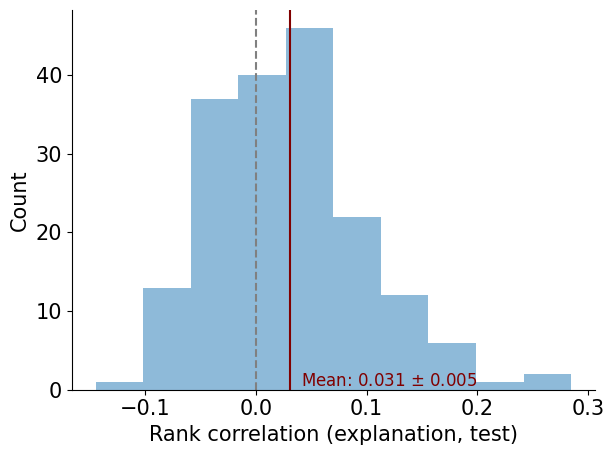

In [24]:
plt.hist(r['rankcorr_expl_test'], alpha=0.5) #, bins=20)
plt.axvline(0, color='gray', linestyle='dashed')
plt.ylabel('Count')

# draw vertical line at mean and add text label
plt.axvline(r['rankcorr_expl_test'].mean(), color='maroon')
mean_and_std_err_string = f"Mean: {r['rankcorr_expl_test'].mean():.3f} $\pm$ {r['rankcorr_expl_test'].std() / np.sqrt(r['rankcorr_expl_test'].size):.3f}"
plt.text(r['rankcorr_expl_test'].mean() + 0.01, 0.5, mean_and_std_err_string, rotation=0, fontsize=12, color='maroon')
plt.xlabel('Rank correlation (explanation, test)')
plt.show()

### Visualize how things relate to each other

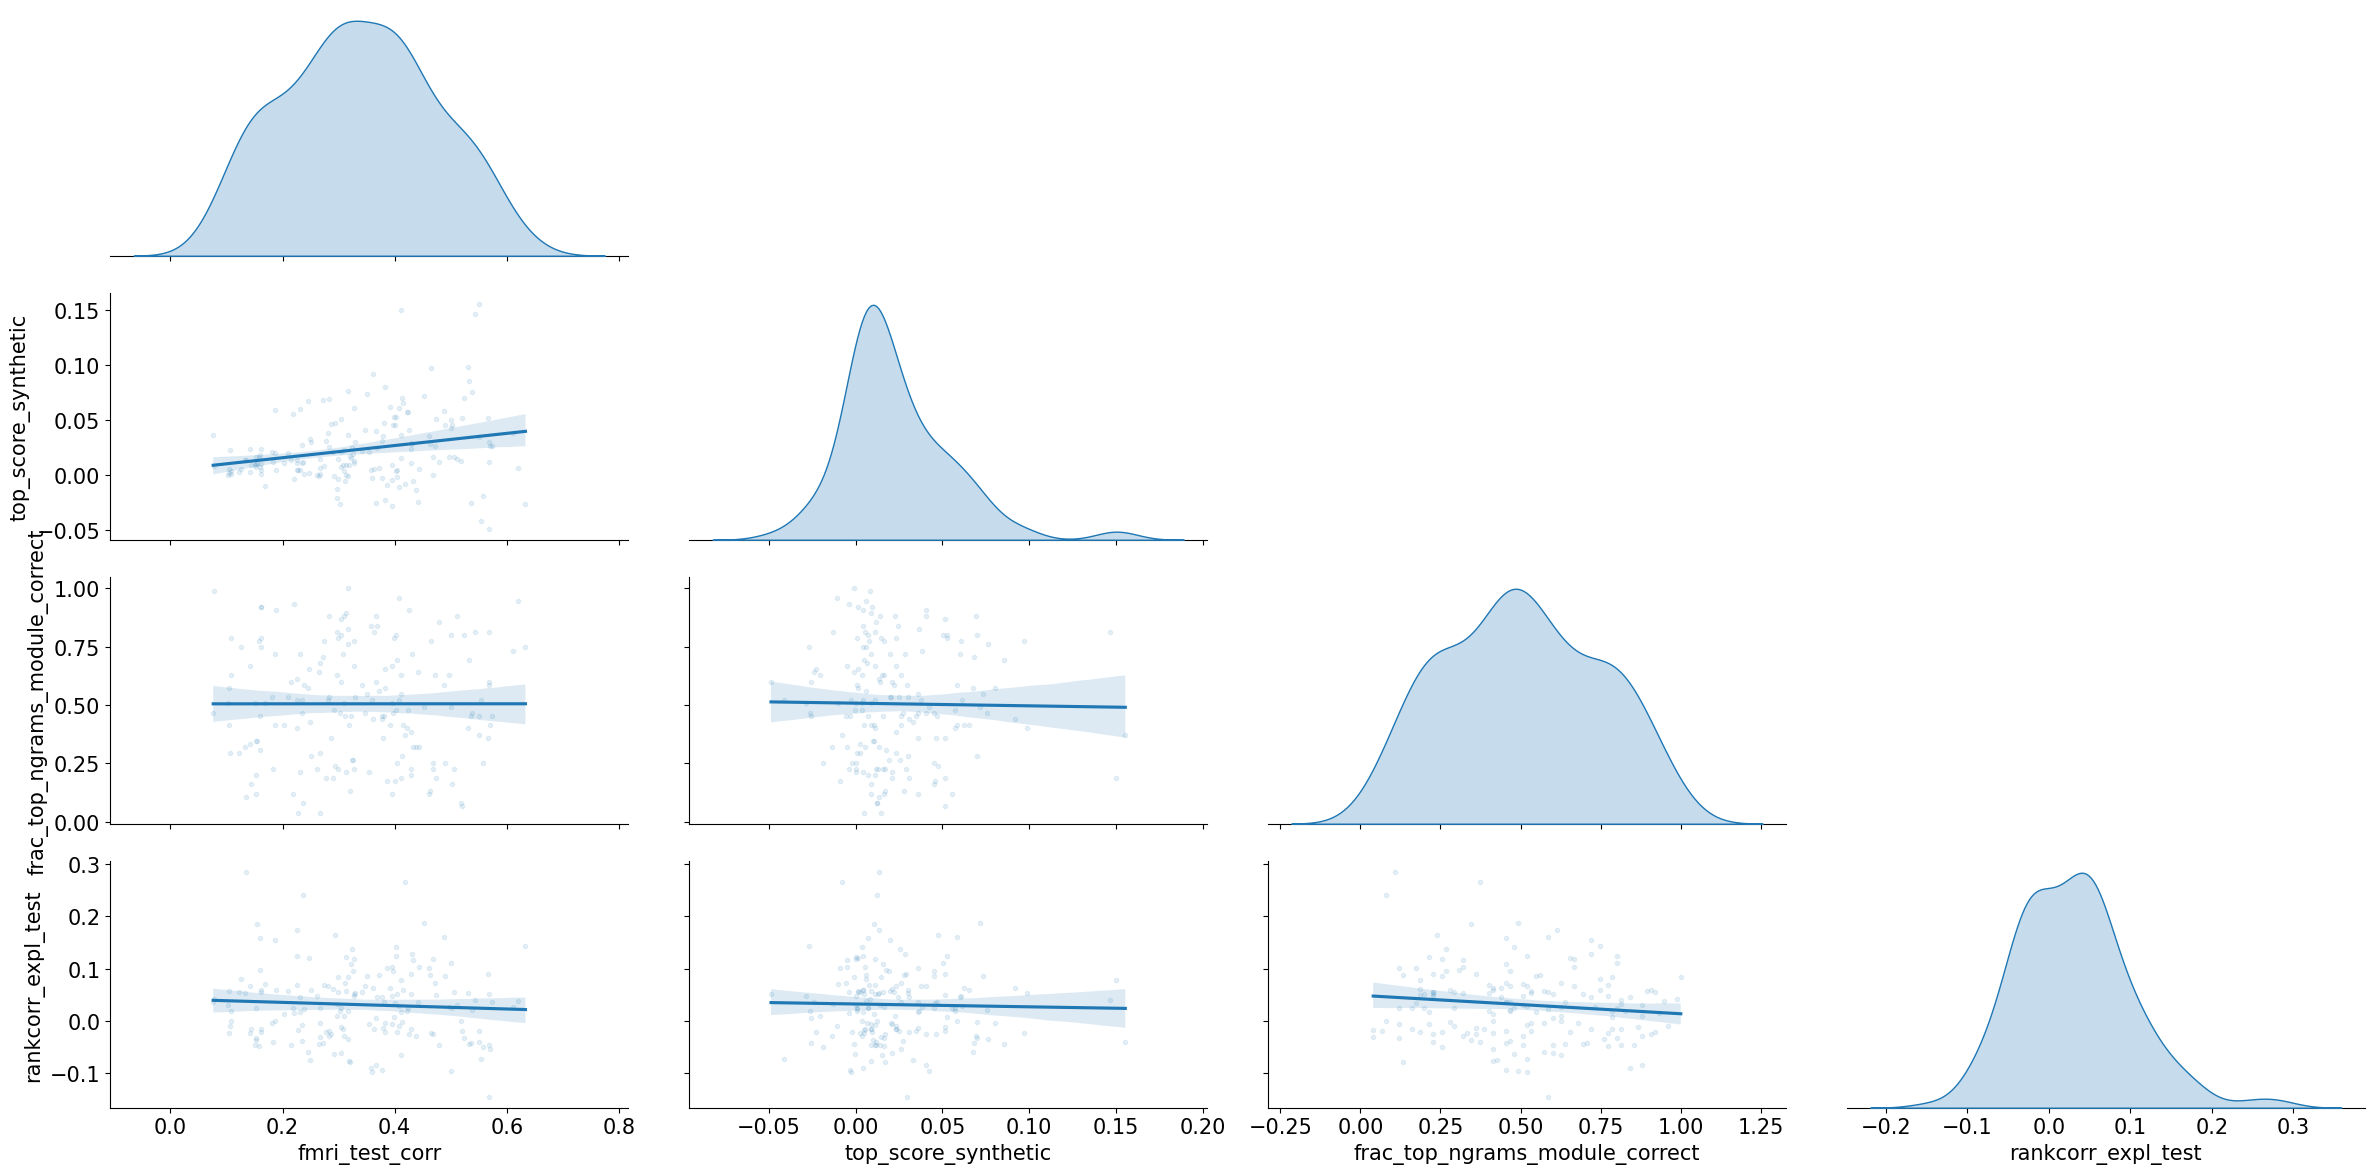

In [19]:
scores = ['fmri_test_corr', 'top_score_synthetic', 'frac_top_ngrams_module_correct', 'rankcorr_expl_test']
sns.pairplot(
    r[scores], kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}}, markers='.',
    height=3, aspect=2,
    corner=True
    )
plt.show()